In [2]:
import pandas as pd
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np

movie_data = "data/movie_dataset.csv"
read_data = pd.read_csv(movie_data)
read_data.head()



,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton


In [3]:
# Number of movies without a director
directors_list =[]
seen_directors = set()
num = 0


for index, row in read_data.iterrows():
    try:
        director = row["director"].strip()
        if director not in seen_directors:
            directors_list.append(director)
            seen_directors.add(director)
    except:
        num = num + 1
   
print(f"Number of movies without a director: {num}")

Number of movies without a director: 36


In [4]:

#Top 5 directors with the highest revenue.
directors_revenue = read_data.groupby("director")["revenue"].sum()
top_5_directors = directors_revenue.sort_values(ascending=False).head(5)


print(top_5_directors.index.tolist())

['Steven Spielberg', 'Peter Jackson', 'James Cameron', 'Michael Bay', 'Christopher Nolan']


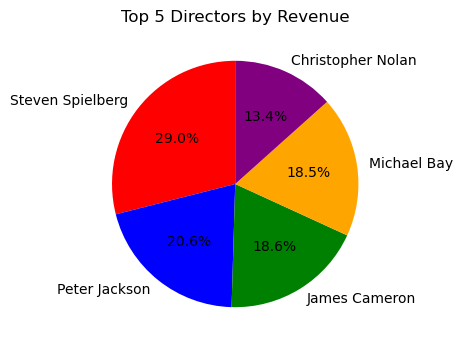

In [5]:
#Create a pie chart the Top 5 directors with the highest revenue
x_axis = np.arange(len(top_5_directors))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(20, 4))  
plt.pie(top_5_directors.values, labels=top_5_directors.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green', 'orange', 'purple'])
plt.title('Top 5 Directors by Revenue')
plt.show()